<a href="https://colab.research.google.com/github/ahmed98Osama/credit_card_customer_segmentation/blob/main/credit_card_customer_segmentation_pca_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Load Data

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/mohan-aditya05/credit_card_customer_segmentation/master/CC%20GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.drop('CUST_ID', axis=1, inplace=True)

# Missing Values

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace=True)

In [ ]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Exploratory Data Analysis

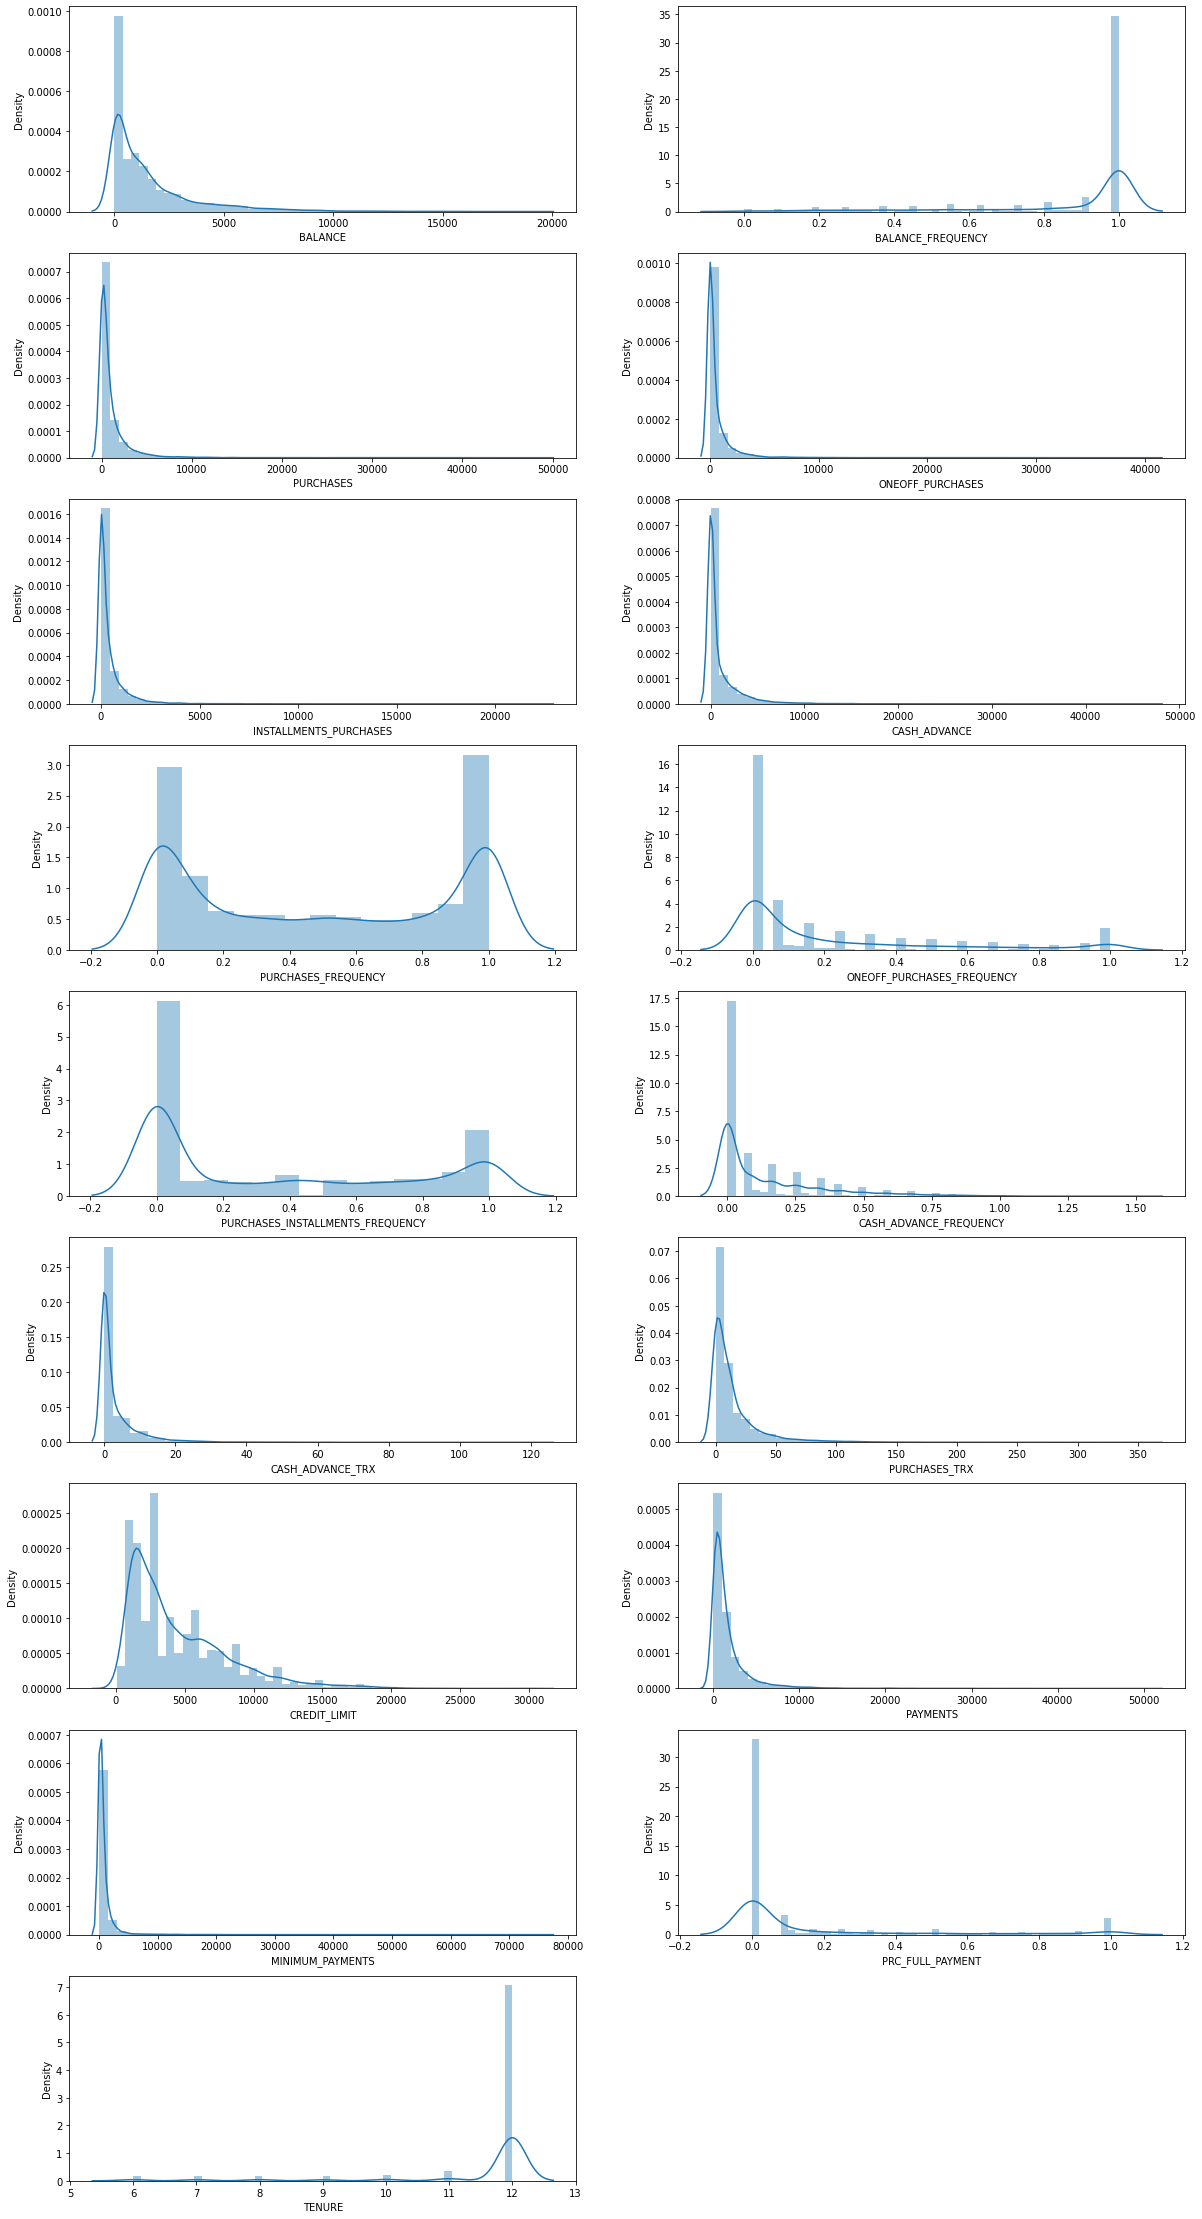

In [ ]:
i=1
plt.figure(figsize= (20,40))
for col in df.columns:
    plt.subplot(9,2,i)
        
    sns.distplot(df[col])
    
    i=i+1
plt.show()

In [ ]:
for col in df.columns:
    print(col)
    print({df[col].skew()})

BALANCE
{2.393270481328754}
BALANCE_FREQUENCY
{-2.0241932378008083}
PURCHASES
{8.143969328745825}
ONEOFF_PURCHASES
{10.044621791824193}
INSTALLMENTS_PURCHASES
{7.298823158100543}
CASH_ADVANCE
{5.1663234455291605}
PURCHASES_FREQUENCY
{0.0599701177816327}
ONEOFF_PURCHASES_FREQUENCY
{1.5354529638777794}
PURCHASES_INSTALLMENTS_FREQUENCY
{0.5090232211948914}
CASH_ADVANCE_FREQUENCY
{1.8286441199006067}
CASH_ADVANCE_TRX
{5.72097632533681}
PURCHASES_TRX
{4.6304932272467205}
CREDIT_LIMIT
{1.5224640052886198}
PAYMENTS
{5.90746501386916}
MINIMUM_PAYMENTS
{13.851863625728104}
PRC_FULL_PAYMENT
{1.9426413977925}
TENURE
{-2.9447877484535407}


**It seems that our data is skewed**

To deal with the skewness, we will transform it using square root method

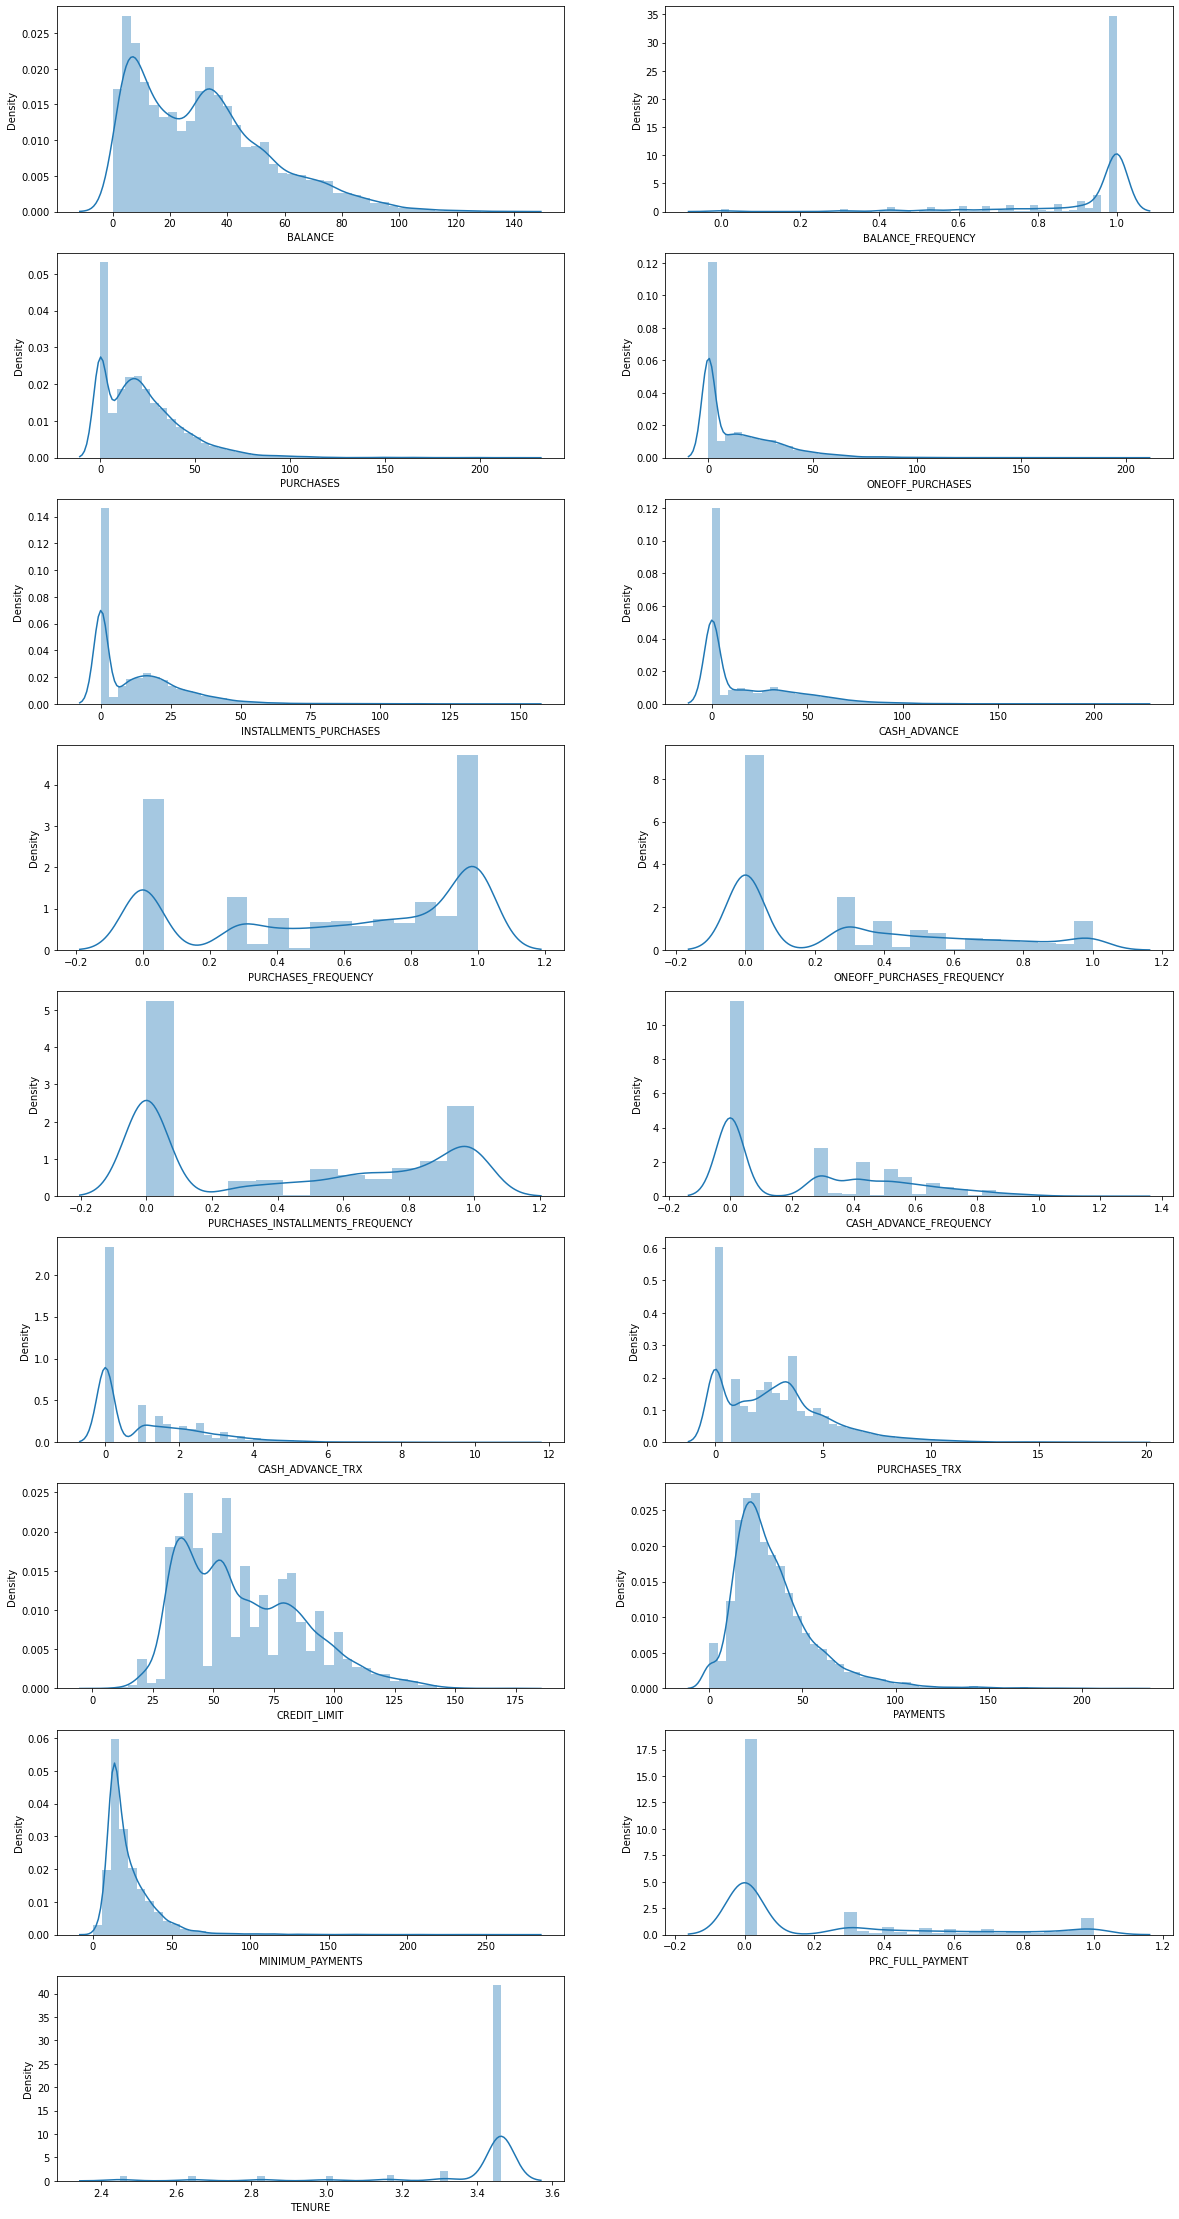

In [ ]:
i=1
plt.figure(figsize=(20,40))
for col in df.columns:
    plt.subplot(9,2,i)
    df[col]= np.sqrt(df[col])
    sns.distplot(df[col])
    i=i+1
    
plt.show()

**There is still skewness, but it is better than before**

In [ ]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.904534,9.767292,0.000000,9.767292,0.000000,0.408249,0.000000,0.288675,0.000000,0.000000,1.414214,31.622777,14.205706,11.811426,0.000000,3.464102
1,56.590347,0.953463,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,83.666003,64.054919,32.746606,0.471404,3.464102
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.464102,86.602540,24.941266,25.045654,0.000000,3.464102
3,40.824877,0.797724,38.716921,38.716921,0.000000,14.345313,0.288675,0.288675,0.000000,0.288675,1.000000,1.000000,86.602540,0.000000,17.676320,0.000000,3.464102
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.288675,0.288675,0.000000,0.000000,0.000000,1.000000,34.641016,26.044861,15.645806,0.000000,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,5.337932,1.000000,17.062239,0.000000,17.062239,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,18.044236,6.991879,0.707107,2.449490
8946,4.379865,1.000000,17.320508,0.000000,17.320508,0.000000,1.000000,0.000000,0.912871,0.000000,0.000000,2.449490,31.622777,16.609073,17.676320,0.000000,2.449490
8947,4.837217,0.912871,12.016655,0.000000,12.016655,0.000000,0.912871,0.000000,0.816497,0.000000,0.000000,2.236068,31.622777,9.015031,9.078456,0.500000,2.449490
8948,3.668455,0.912871,0.000000,0.000000,0.000000,6.046386,0.000000,0.000000,0.000000,0.408249,1.414214,0.000000,22.360680,7.249135,7.466969,0.500000,2.449490


**Plotting correlation heatmap to see if there are many co=related features**

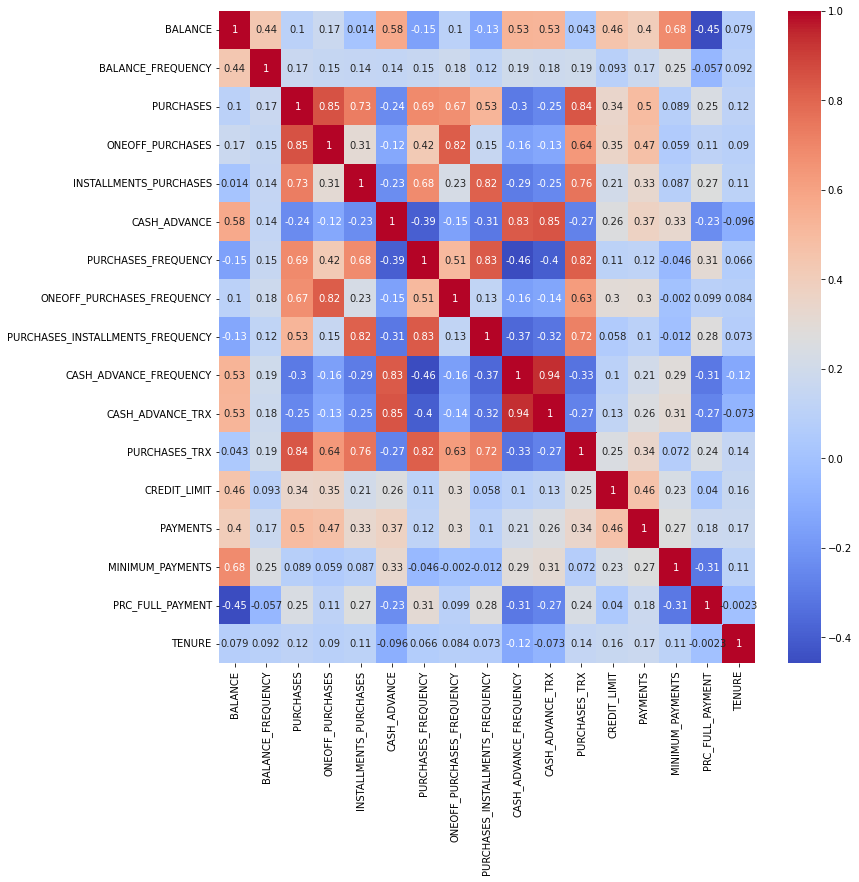

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**There are many co-related features**

# Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
df= ss.fit_transform(df)

pca= PCA()
pca.fit(df)


PCA()

In [ ]:
df

array([[-1.07820684, -0.09750658, -0.59702068, ..., -0.64488138,
        -0.63623175,  0.35334418],
       [ 1.05351   ,  0.19028849, -1.04245862, ...,  0.54587004,
         0.78877679,  0.35334418],
       [ 0.77156511,  0.46401899,  0.22563265, ...,  0.10785519,
        -0.63623175,  0.35334418],
       ...,
       [-1.14437957, -0.04847104, -0.49443836, ..., -0.80032727,
         0.87521881, -4.28074194],
       [-1.19401541, -0.04847104, -1.04245862, ..., -0.89198546,
         0.87521881, -4.28074194],
       [-0.5299237 , -0.61533798,  0.46544213, ..., -0.78225349,
        -0.63623175, -4.28074194]])

# Before Applying PCA

In [ ]:
def plot_Clusters(df,f1,f2,labels_, only_clustered = False):
    plt.clf()
    clusters = np.unique(labels_)
    colors = ['r','g','c','m','y','k','#222222','#22FFF2','#24AAA2','#22FF22','grey']
    for c in clusters:   
        if(only_clustered):
            if (c==-1):
                continue
        c_label = 'Noise' if (c==-1) else f'cluster {c}'
        plt.scatter(df[labels_==c][f1], df[labels_==c][f2],c=colors[c],label=c_label)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title('Plot Using Only 2 Features')
    plt.legend()

In [ ]:
scaled_df

array([[-1.07820684, -0.09750658, -0.59702068, ..., -0.64488138,
        -0.63623175,  0.35334418],
       [ 1.05351   ,  0.19028849, -1.04245862, ...,  0.54587004,
         0.78877679,  0.35334418],
       [ 0.77156511,  0.46401899,  0.22563265, ...,  0.10785519,
        -0.63623175,  0.35334418],
       ...,
       [-1.14437957, -0.04847104, -0.49443836, ..., -0.80032727,
         0.87521881, -4.28074194],
       [-1.19401541, -0.04847104, -1.04245862, ..., -0.89198546,
         0.87521881, -4.28074194],
       [-0.5299237 , -0.61533798,  0.46544213, ..., -0.78225349,
        -0.63623175, -4.28074194]])

## Hierarchical

NameError: ignored

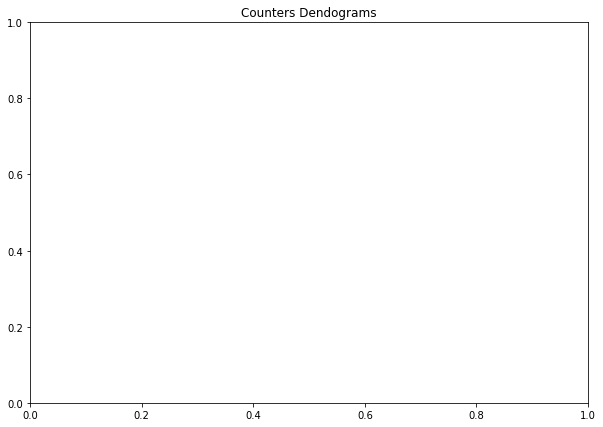

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=scaled_df , method='ward',metric='euclidean'))

In [ ]:
model_H = AgglomerativeClustering(n_clusters=3)
model_H = model_H.fit(scaled_df)
labels_H = model_H.labels_

In [ ]:
ss_H =silhouette_score(scaled_df, labels_H)
print(f'Silhouette_Score Of Hierarchical : {ss_H}')

In [ ]:
F1 = 'P1'
F2 = 'P2'
X = scaled_df[[F1,F2]]
plt.scatter(X[F1], X[F2])
plt.xlabel(F1)
plt.ylabel(F2)

In [ ]:
plot_Clusters(X,F1,F2,labels_H,True)

## Kmeans

In [ ]:
def plot_elbow(d,K_range=range(1, 10)): 
    distortions = []
    K = range(1, 10)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(d)
        kmeanModel.fit(d)
        distortions.append(kmeanModel.inertia_)

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

In [ ]:
plot_elbow(scaled_df)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
Km_labels = kmeans.labels_

In [ ]:
ss_kmeans = silhouette_score(scaled_df, Km_labels)
print(f'Silhouette_Score Of Kmeans : {ss_kmeans}')

In [ ]:
plot_Clusters(X,F1,F2,Km_labels,True)

## GMM

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0).fit(scaled_df)
gm_labels = gm.predict(scaled_df)
gm_labels

In [ ]:
ss_df_gmm =silhouette_score(scaled_df, gm_labels)
print(f'Silhouette_Score Of GMM : {ss_df_gmm}')
plot_Clusters(scaled_df,F1,F2,gm_labels,True)

In [ ]:
# dbscan and plot
ss_dbscan_dict={}
for n in np.arange(0.25,12,0.25):
    clustering = DBSCAN(eps=n, min_samples=6).fit(scaled_df)
    labels_db = clustering.labels_
    if(len(set(labels_db))>2):
        ss =silhouette_score(scaled_df, labels_db)
        ss_dbscan_dict[n]=ss

In [ ]:
ss_dbscan_dict

In [ ]:
clustering = DBSCAN(eps=3.25, min_samples=6).fit(scaled_df)
labels_dbscan = clustering.labels_
ss_db =silhouette_score(scaled_df, labels_dbscan)
print(f'Silhouette_Score Of DBSCAN : {ss_db}')

In [ ]:
set(labels_dbscan)

In [ ]:
plot_Clusters(X,F1,F2,labels_dbscan,True)

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(df)
plt.plot(pca.explained_variance_ratio_.cumsum())
pca= PCA(n_components=6)
X= pca.fit_transform(df)

pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

In [ ]:
best_dim = np.argmax(cumsum >= 0.95) + 1
best_dim

In [ ]:
#Initiating PCA to reduce dimentions  
pca = PCA(n_components=best_dim)
pca.fit(scaled_df)
#
cols=[]
for i in np.arange(best_dim):
    cols.append('PCA' + str(i+1))
#
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(cols))
PCA_df.describe().T

## Hierarchical

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=PCA_df , method='ward',metric='euclidean'))

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(PCA_df)
labels_PCA_H = model.labels_

In [ ]:
F1 = 'PCA6'
F2 = 'PCA12'
X = PCA_df[[F1,F2]]
plt.scatter(X[F1], X[F2])

In [ ]:
plot_Clusters(X,F1,F2,labels_PCA_H,True)

In [ ]:
ss_PCA_H =silhouette_score(PCA_df, labels)
print(f'Silhouette_Score Of Hierarchical : {ss_PCA_H}')

## Kmeans

In [ ]:
plot_elbow(PCA_df)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCA_df)
kmeans.labels_

In [ ]:
ss_PCA_kmeans =silhouette_score(PCA_df, kmeans.labels_)
print(f'Silhouette_Score Of Kmeans : {ss_PCA_kmeans}')

In [ ]:
plot_Clusters(X,F1,F2,labels,True)

## GMM

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0).fit(PCA_df)
gm_labels = gm.predict(PCA_df)
gm_labels

In [ ]:
ss_PCA_df_gmm =silhouette_score(PCA_df, gm_labels)
print(f'Silhouette_Score Of GMM : {ss_PCA_df_gmm}')
plot_Clusters(PCA_df,F1,F2,gm_labels,True)

In [ ]:
# dbscan and plot
ss_dict={}
for n in np.arange(0.25,12,0.25):
    clustering = DBSCAN(eps=n, min_samples=6).fit(PCA_df)
    labels_db = clustering.labels_
    if(len(set(labels_db))>2):
        ss =silhouette_score(PCA_df, labels_db)
        ss_dict[n]=ss

In [ ]:
ss_dict

In [ ]:
clustering = DBSCAN(eps=2.75, min_samples=6).fit(PCA_df)
labels_db = clustering.labels_
ss_PCA_dbscan =silhouette_score(PCA_df, labels_db)
print(f'Silhouette_Score Of DBSCAN : {ss_PCA_dbscan}')

In [ ]:
plot_Clusters(X,F1,F2,labels_db,True)

# KMeans Clustering

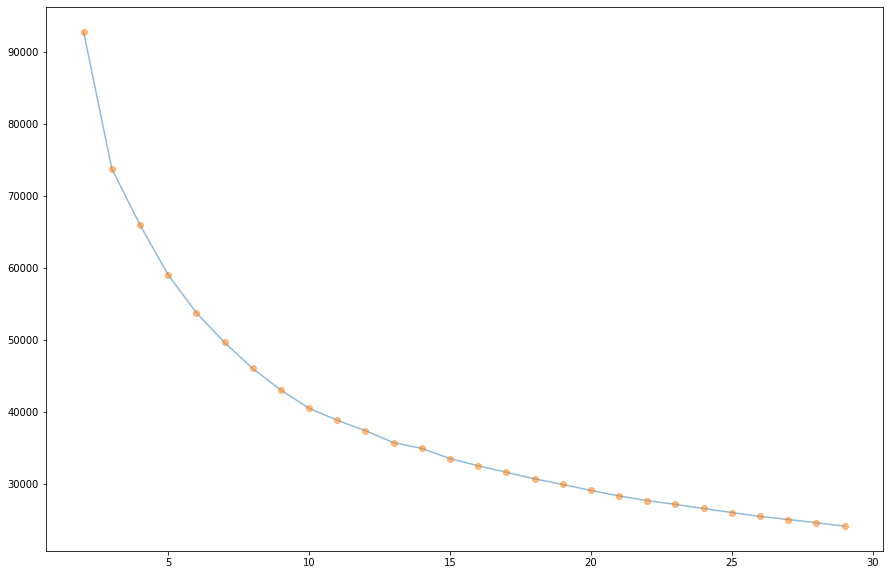

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.figure(figsize=(15,10))
distortions=[]
sil_scores=[]
for i in range(2,30):
    kmeans= KMeans(n_clusters=i, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    label= kmeans.labels_
    sil_scores.append(silhouette_score(X, label))
plt.plot(np.arange(2,30,1), distortions, alpha=0.5)
plt.plot(np.arange(2,30,1), distortions,'o' ,alpha=0.5)
plt.show()

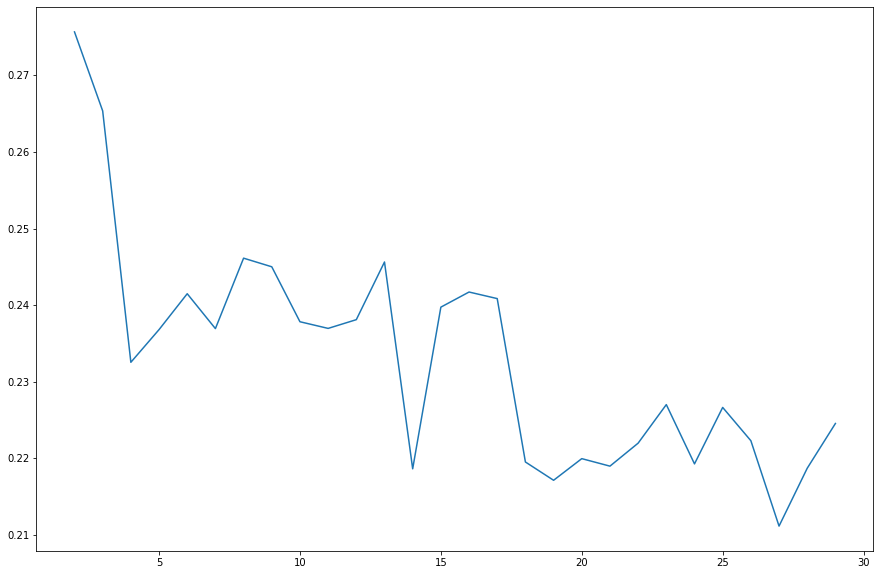

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,30,1), sil_scores)
plt.show()

**5 looks like the right number of clusters for this problem**

In [ ]:
df

array([[-1.07820684, -0.09750658, -0.59702068, ..., -0.64488138,
        -0.63623175,  0.35334418],
       [ 1.05351   ,  0.19028849, -1.04245862, ...,  0.54587004,
         0.78877679,  0.35334418],
       [ 0.77156511,  0.46401899,  0.22563265, ...,  0.10785519,
        -0.63623175,  0.35334418],
       ...,
       [-1.14437957, -0.04847104, -0.49443836, ..., -0.80032727,
         0.87521881, -4.28074194],
       [-1.19401541, -0.04847104, -1.04245862, ..., -0.89198546,
         0.87521881, -4.28074194],
       [-0.5299237 , -0.61533798,  0.46544213, ..., -0.78225349,
        -0.63623175, -4.28074194]])

In [ ]:
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(X)
labels= kmeans.labels_

In [ ]:
df

array([[-1.07820684, -0.09750658, -0.59702068, ..., -0.64488138,
        -0.63623175,  0.35334418],
       [ 1.05351   ,  0.19028849, -1.04245862, ...,  0.54587004,
         0.78877679,  0.35334418],
       [ 0.77156511,  0.46401899,  0.22563265, ...,  0.10785519,
        -0.63623175,  0.35334418],
       ...,
       [-1.14437957, -0.04847104, -0.49443836, ..., -0.80032727,
         0.87521881, -4.28074194],
       [-1.19401541, -0.04847104, -1.04245862, ..., -0.89198546,
         0.87521881, -4.28074194],
       [-0.5299237 , -0.61533798,  0.46544213, ..., -0.78225349,
        -0.63623175, -4.28074194]])

**We use PCA again so that we can reduce the data to 2 components, in order to visualize our clusters better**

In [ ]:
pca= PCA(n_components=2)
X2= pca.fit_transform(df)

In [ ]:
pca_df = pd.DataFrame(data=X2, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-0.893102,-2.470296,1
1,-2.997217,2.030084,2
2,1.191889,0.386961,1
3,-0.771674,0.015638,1
4,-1.271139,-1.578252,1


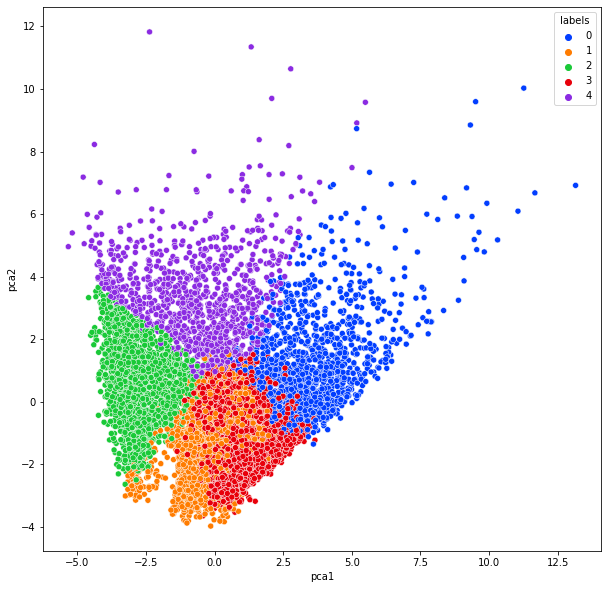

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')